In [2]:
import numpy as np
from skimage import data, exposure, filters
import matplotlib.pyplot as plt
from skimage.morphology import disk


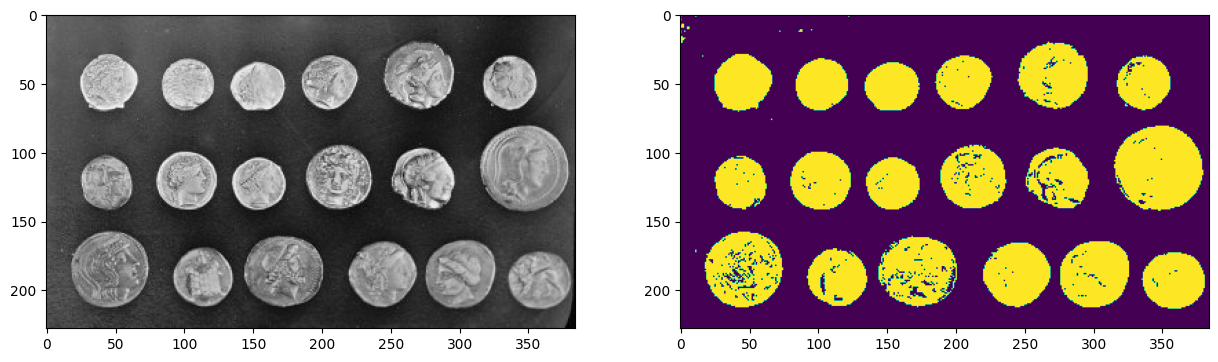

In [3]:
threshold = 105
I = data.coins()
I = I[75:, :]
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(I, cmap='gray')
plt.subplot(122)
seg_I = I > threshold
plt.imshow(seg_I)

Text(0, 0.5, 'Pixel count')

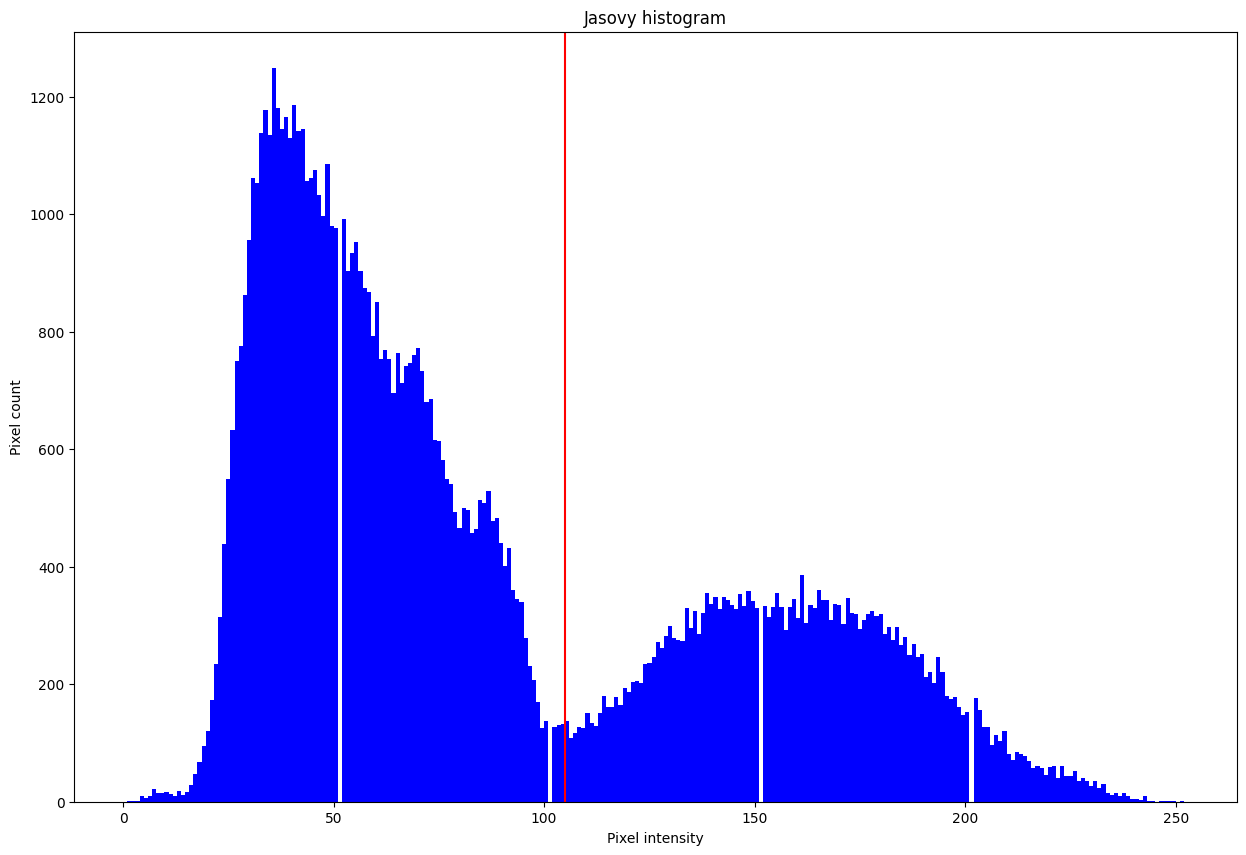

In [4]:
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(111)
plt.hist(I.ravel(), bins=256, histtype='bar', color='blue')
plt.axvline(threshold, color='r')

plt.title("Jasovy histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count")

In [5]:
mean_object_intensity = np.mean(I[seg_I])
mean_background_intensity = np.mean(I[seg_I==0])

threshold = (mean_object_intensity + mean_background_intensity) / 2
counter = 0

while True:
  background = I < threshold
  obj = I >= threshold

  mean_object_intensity = np.mean(I[obj])
  mean_background_intensity = np.mean(I[background])

  new_threshold = (mean_object_intensity + mean_background_intensity) / 2

  if np.abs(threshold - new_threshold) < 0.1:
    break

  counter += 1
  threshold = new_threshold

print("Coberged to optimal threshold in {} iteration with threshold: {}".format(counter, threshold))

Coberged to optimal threshold in 1 iteration with threshold: 107.95877673512632


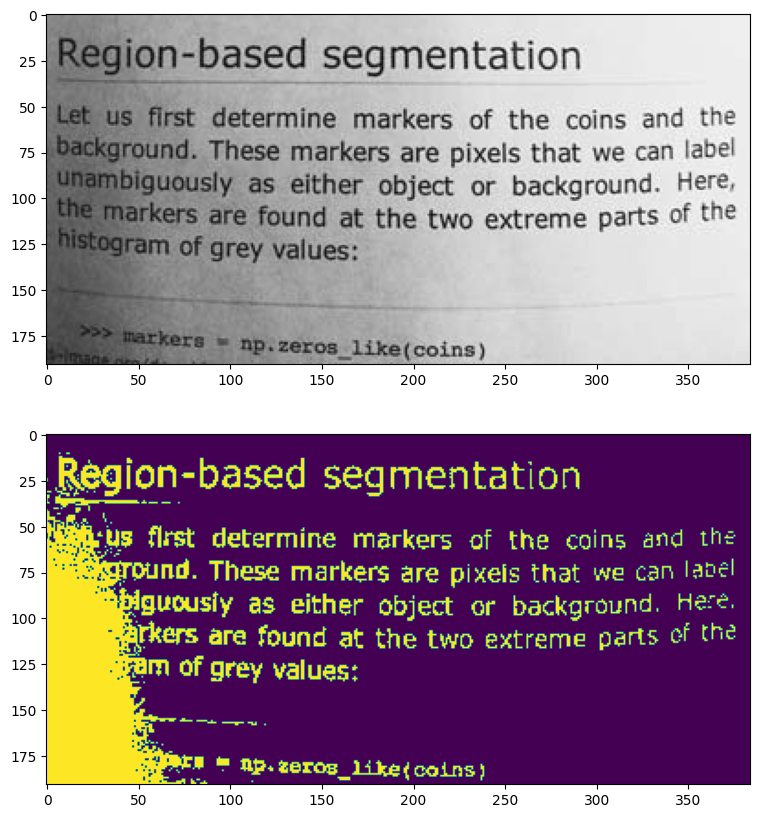

In [6]:
I2 = data.page()
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.imshow(I2, cmap='gray')
plt.subplot(212)
plt.imshow(I2<120)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


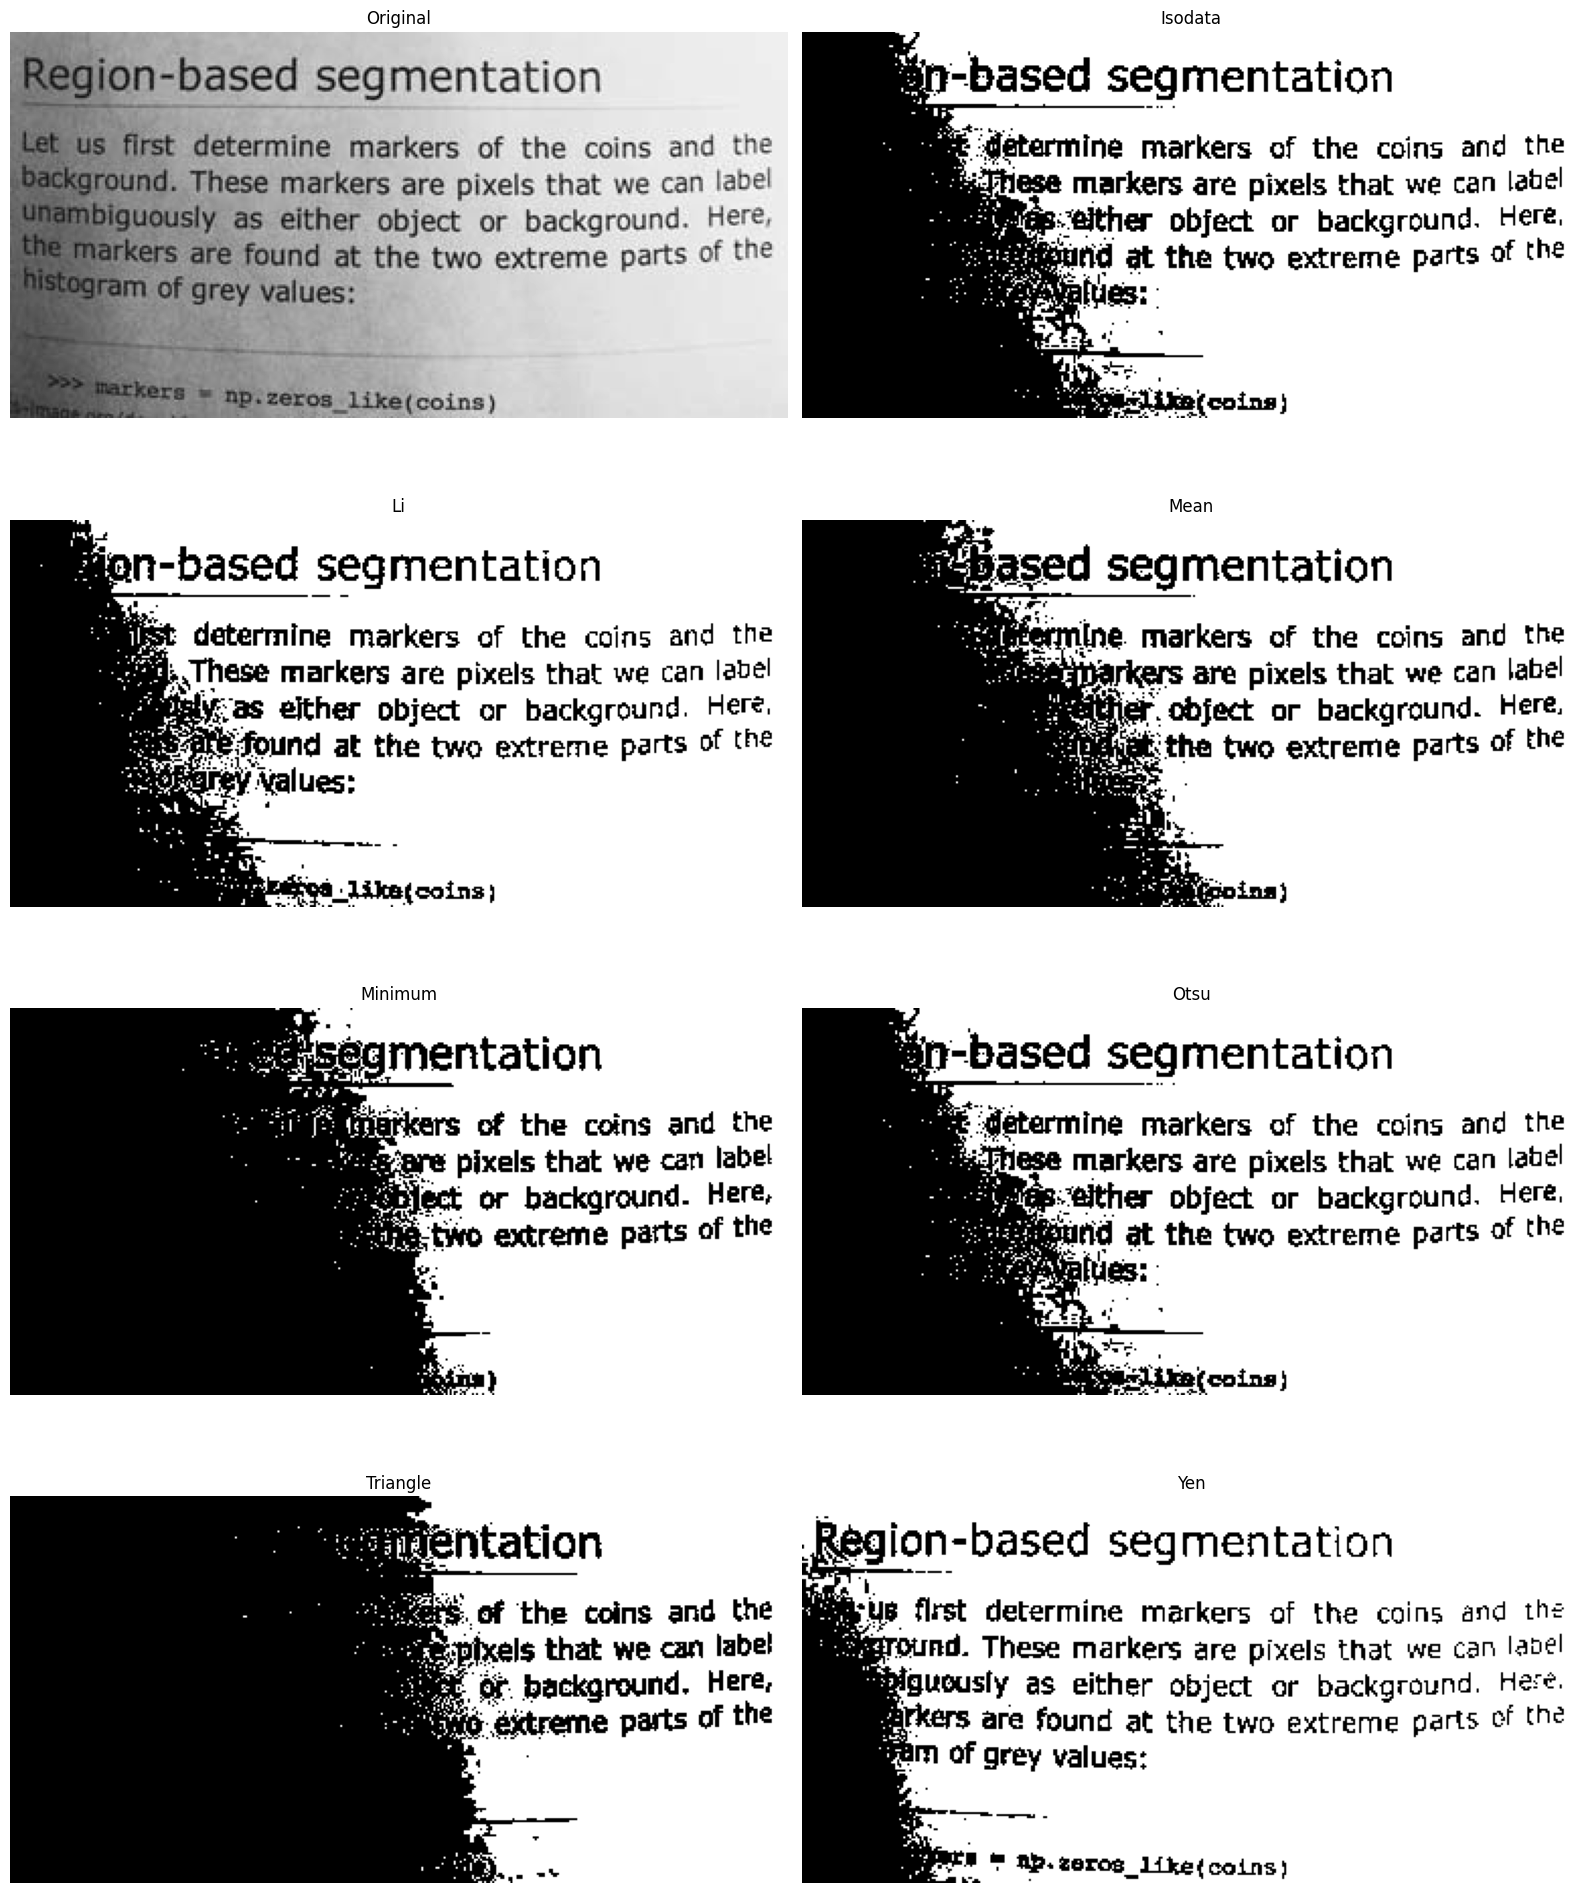

In [7]:
fig, ax = filters.try_all_threshold(I2, figsize=(16, 20))
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


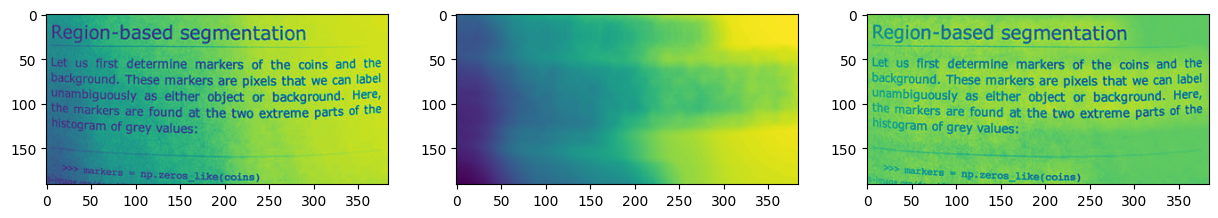

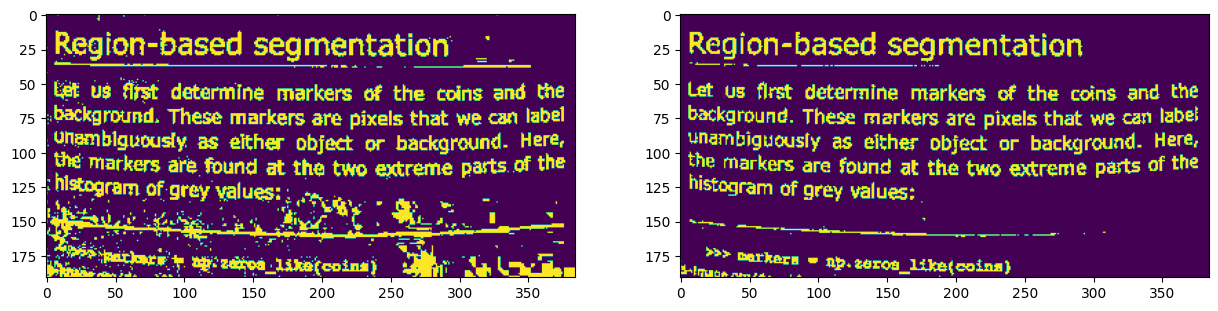

In [8]:
s_elem = disk(20)
I2_float = I2 / 255
I_filt = filters.rank.mean(I2_float, footprint=s_elem) / 255

plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(I2_float)
plt.subplot(132)
plt.imshow(I_filt)
plt.subplot(133)
plt.imshow(I2_float - I_filt)

im_t1 = (I2_float - I_filt) < 0.0
im_t2 = (I2_float - I_filt) < -0.05

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(im_t1)
plt.subplot(122)
plt.imshow(im_t2)

Text(0.5, 1.0, 'B')

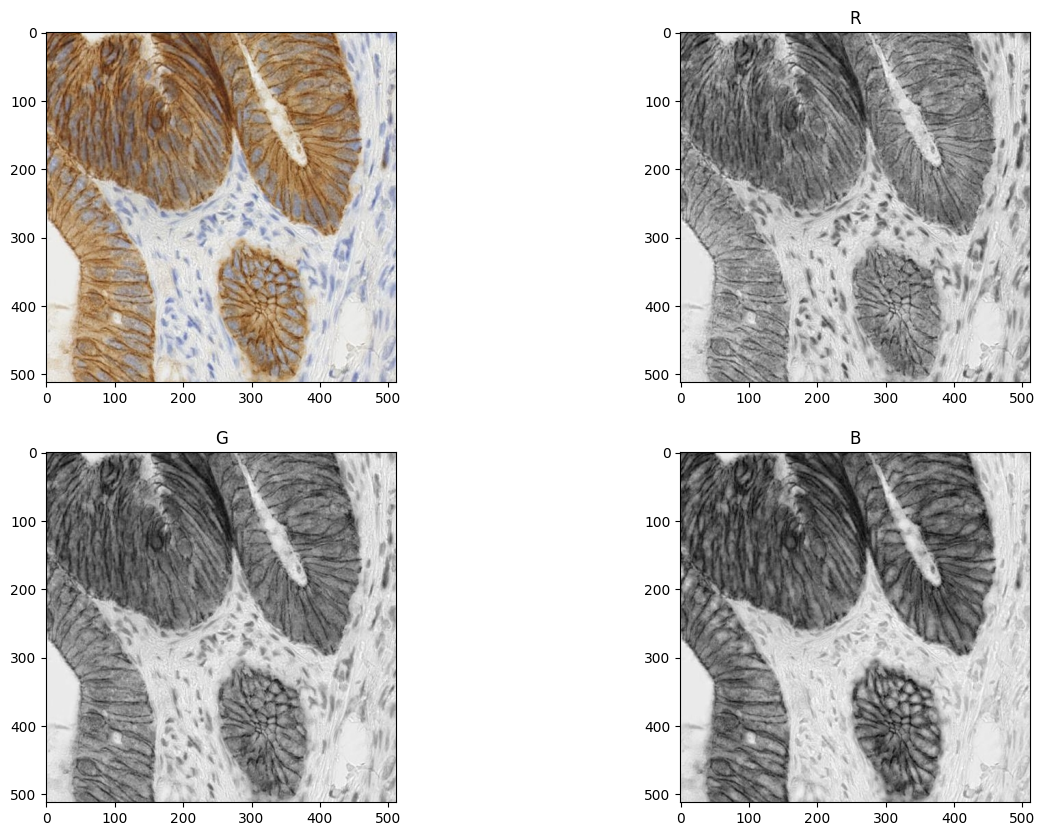

In [9]:
I3 = data.immunohistochemistry()

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3[:, :, 0], cmap='gray')
plt.title('R')
plt.subplot(223)
plt.imshow(I3[:, :, 1], cmap='gray')
plt.title('G')
plt.subplot(224)
plt.imshow(I3[:, :, 2], cmap='gray')
plt.title('B')

Text(0.5, 1.0, 'Result mask')

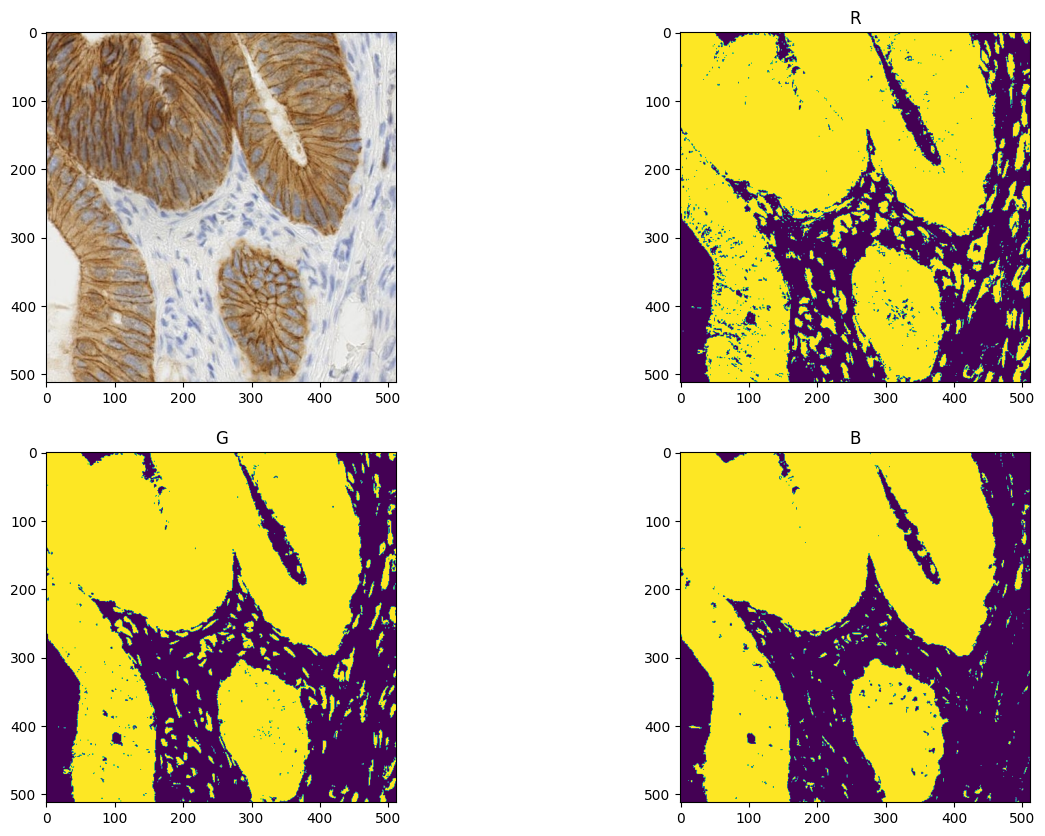

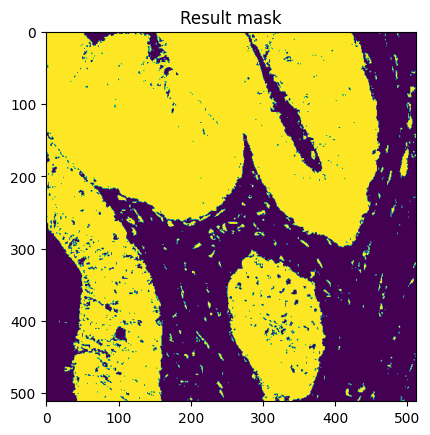

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)

plt.subplot(222)
t_R = I3[:, :, 0] < 200
plt.imshow(t_R )
plt.title('R')

plt.subplot(223)
t_G = I3[:, :, 1] < 185
plt.imshow(t_G)
plt.title("G")

plt.subplot(224)
t_B = I3[:, :, 2] < 180
plt.imshow(t_B)
plt.title('B')

plt.figure()
mask = np.logical_and(np.logical_and(t_R, t_G), t_B)
plt.imshow(mask)
plt.title('Result mask')

Text(0.5, 1.0, 'b')

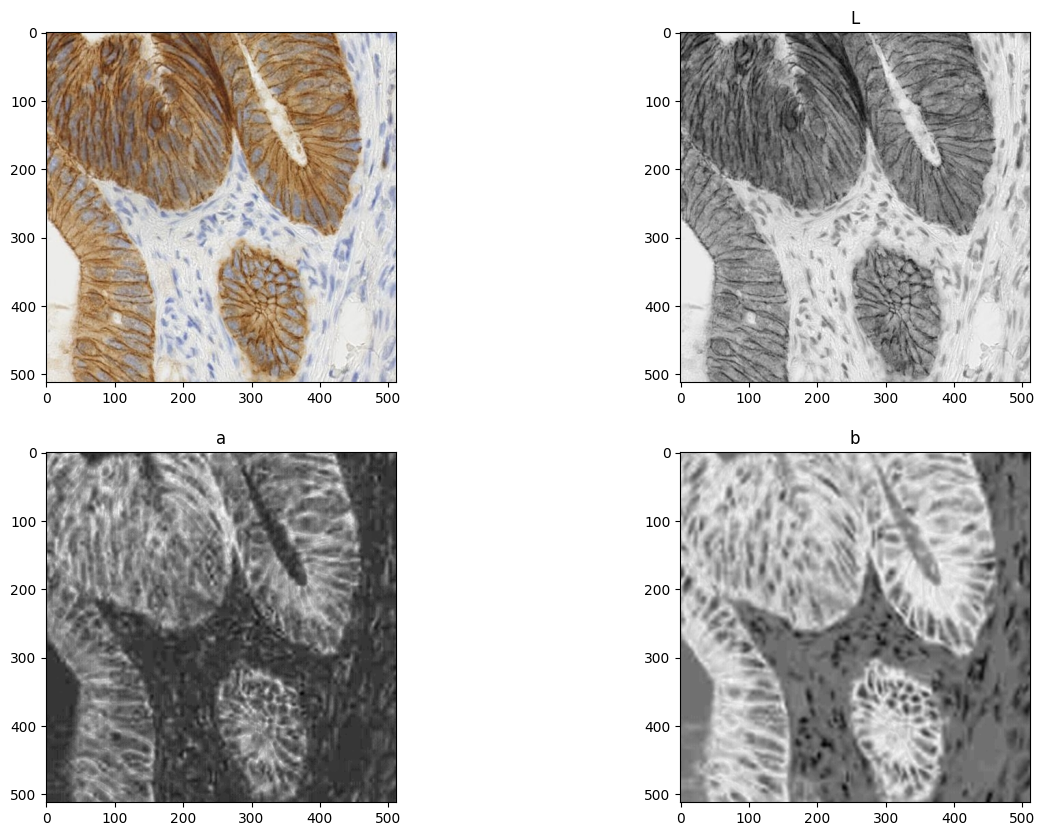

In [11]:
from skimage import color
I3_lab = color.rgb2lab(I3)
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3_lab[:, :, 0], cmap='gray')
plt.title('L')
plt.subplot(223)
plt.imshow(I3_lab[:, :, 1], cmap='gray')
plt.title('a')
plt.subplot(224)
plt.imshow(I3_lab[:, :, 2], cmap='gray')
plt.title('b')

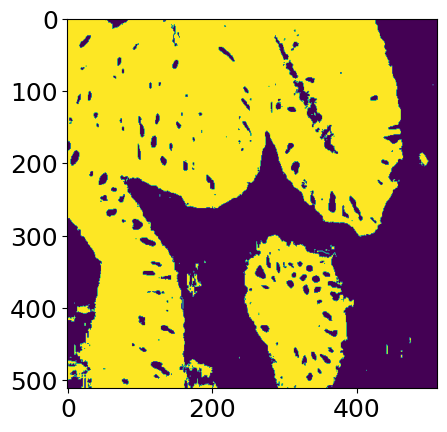

In [42]:
my_seg = (I3_lab[:, :, 1] > 0) * (I3_lab[:, :, 2] < 100) * (I3_lab[:, :, 1] < 100) * (I3_lab[:, :, 2] > 3)
plt.imshow(my_seg)

## Segmentation by color
Color segmentation is a computer vision and image processing technique used to partition an image into distinct regions or objects based on their color characteristics. It involves separating objects or regions in an image by identifying and classifying pixels or areas that share similar color properties. Color segmentation is commonly used in applications like object recognition, image processing, and computer vision to extract meaningful information from images.

Color models, also known as color spaces, are mathematical representations that define how colors are represented and encoded in digital images. These models provide a way to represent colors in a manner that is perceptually meaningful and suitable for various applications. Common color models include RGB (Red, Green, Blue), HSV (Hue, Saturation, Value), CMYK (Cyan, Magenta, Yellow, Key/Black), and Lab (CIELAB or Lab*).

Text(0.5, 1.0, 'Intensity of Blue')

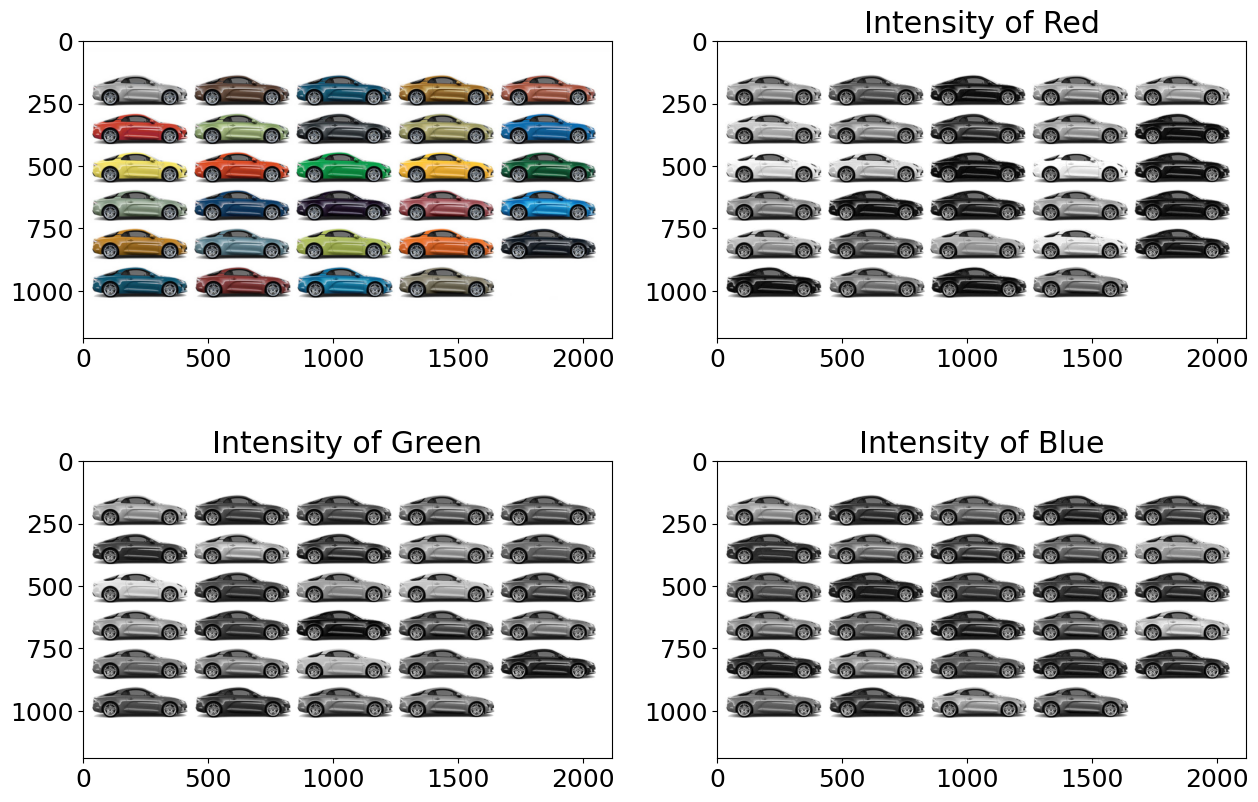

In [23]:
cars = plt.imread('/content/color_cars.jpeg')
plt.figure(figsize=(15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cars)
plt.subplot(222)
plt.imshow(cars[:, :, 0], cmap='gray')
plt.title('Intensity of Red')
plt.subplot(223)
plt.imshow(cars[:, :, 1], cmap='gray')
plt.title('Intensity of Green')
plt.subplot(224)
plt.imshow(cars[:, :, 2], cmap='gray')
plt.title('Intensity of Blue')

CIELAB, often referred to as Lab color space, is a color model designed to approximate human perception of color. It is a three-component color space consisting of the following components:

* L* (lightness): Represents the brightness or intensity of a color from black (0) to white (100).
* a* (green to red): Represents the position of a color on the green-to-red axis.
* b* (blue to yellow): Represents the position of a color on the blue-to-yellow axis.

CIELAB is perceptually uniform, meaning that the Euclidean distance between two Lab colors corresponds closely to the perceived color difference between them.


![CieLab](https://www.xrite.com/-/media/modules/weblog/blog/lab-color-space/lab-color-space.png?h=622&w=600&la=en&hash=53A76941BAB3015346FAB3689739E967843CF8EA)

Text(0.5, 1.0, 'b')

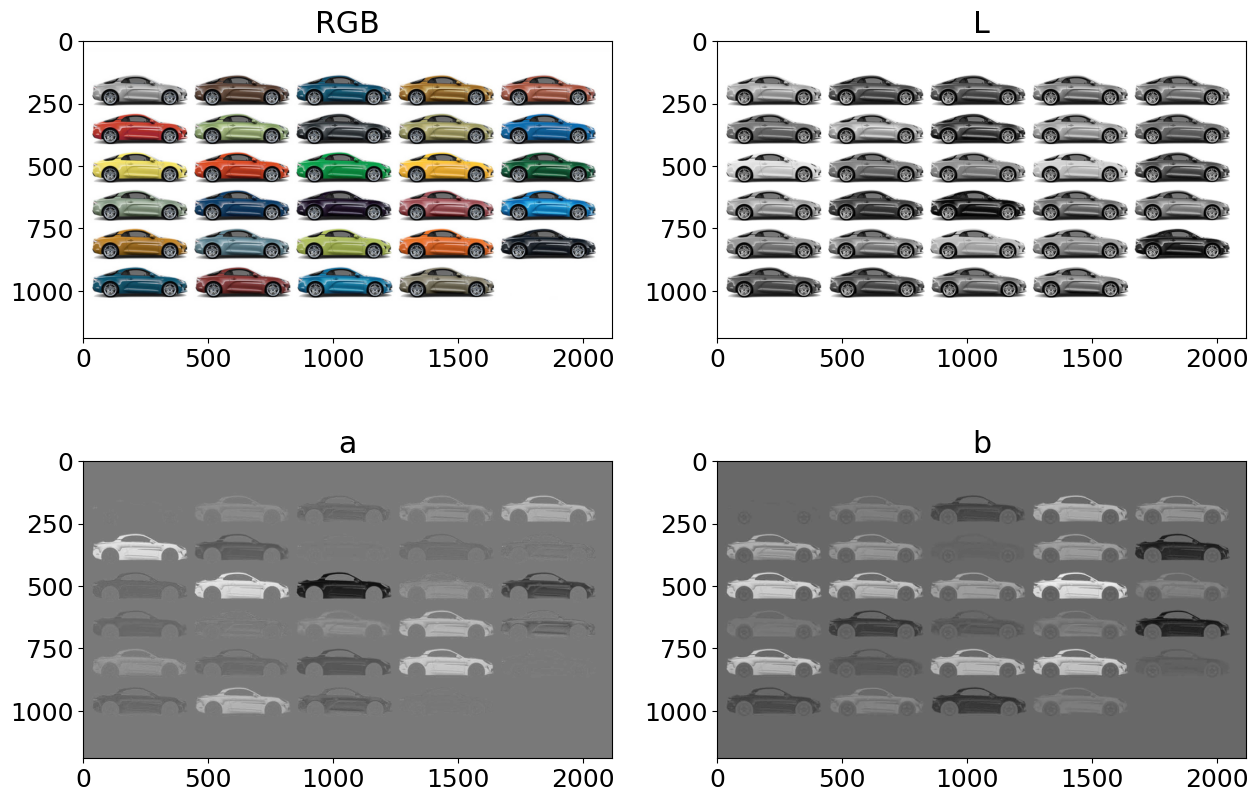

In [24]:
from skimage import color
carsLab = color.rgb2lab(cars)

plt.figure(figsize=(15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cars)
plt.title('RGB')

plt.subplot(222)
plt.imshow(carsLab[:, :, 0], cmap='gray')
plt.title('L')

plt.subplot(223)
plt.imshow(carsLab[:, :, 1], cmap='gray')
plt.title('a')

plt.subplot(224)
plt.imshow(carsLab[:, :, 2], cmap='gray')
plt.title('b')

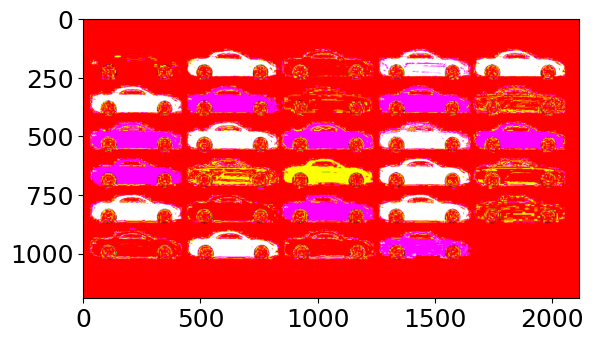

In [19]:
plt.imshow(carsLab)

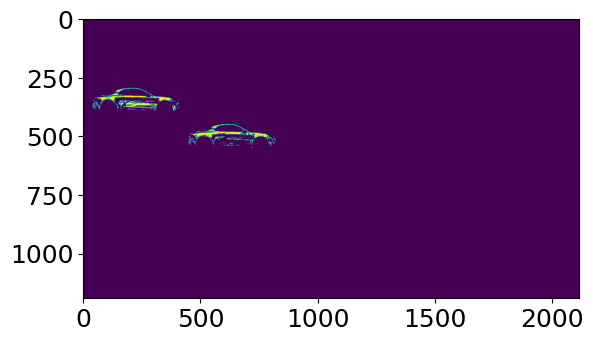

In [31]:
my_car_orange = (carsLab[:, :, 1] > 50) * (carsLab[:, :, 2] < 100) * (carsLab[:, :, 1] < 100) * (carsLab[:, :, 2] > 20)
plt.imshow(my_car_orange)